In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#import the data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### From the above, we can see that, 'sqft_above' is missing 2 data points. All the other columns are complete and have no missing data

In [17]:
#creating a new df with the predictor variables. 'price' is what we're looking to predict.
categories = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','zipcode','price',
              'yr_renovated','sqft_above','sqft_basement']
data = df[categories]
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,price,yr_renovated,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,0,0,3,98178,221900.0,0,1180.0,0
1,3,2.25,2570,7242,2.0,0,0,3,98125,538000.0,1991,2170.0,400
2,2,1.00,770,10000,1.0,0,0,3,98028,180000.0,0,770.0,0
3,4,3.00,1960,5000,1.0,0,0,5,98136,604000.0,0,1050.0,910
4,3,2.00,1680,8080,1.0,0,0,3,98074,510000.0,0,1680.0,0


##### Identifying categorical variables

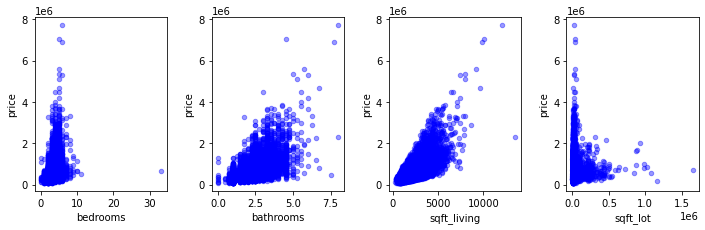

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['bedrooms', 'bathrooms','sqft_living','sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

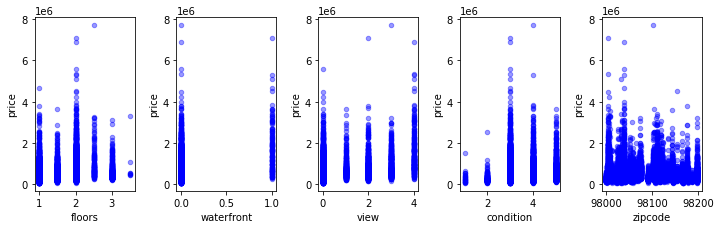

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['floors','waterfront','view','condition','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

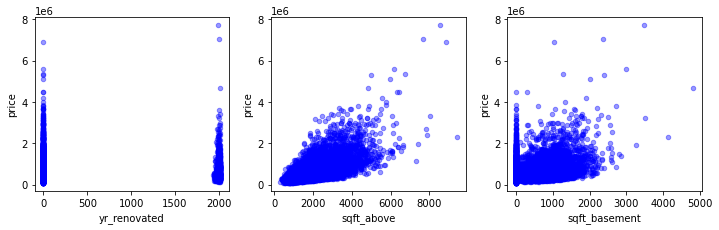

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['yr_renovated','sqft_above','sqft_basement'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')